In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

#for statistical tests
import statsmodels.api as sm
from scipy import stats
import pingouin as pg
import matplotlib.patches as mpatches
from scipy.stats import norm
from scipy.stats import normaltest
import warnings
from scipy.stats import shapiro, pearsonr, spearmanr

In [2]:
df = pd.read_csv("../additional_material/week_05_group_4_cleaned_data.csv")

In [3]:
# Suppress only the specific Shapiro warning
warnings.filterwarnings("ignore", message="scipy.stats.shapiro: For N > 5000.*")

# Getting to know the data

In [4]:
# Convert 'date' to datetime and extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Define the custom order for income groups
income_group_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

In [5]:
# Group by 'year' and 'income_group', count entries
grouped_data = df.groupby(['year', 'income_group']).size().reset_index(name='entries')
print(grouped_data)

     year         income_group  entries
0    1990          High income       77
1    1990           Low income       24
2    1990  Lower middle income       47
3    1990  Upper middle income       53
4    1991          High income       76
..    ...                  ...      ...
115  2018  Upper middle income       53
116  2019          High income       77
117  2019           Low income       24
118  2019  Lower middle income       47
119  2019  Upper middle income       53

[120 rows x 3 columns]


In [6]:
# Check for rows where 'income_group' is missing (NaN)
missing_income_group = df[df['income_group'].isna()]

# Print the countries with missing income_group
print("Countries with missing income group:")
print(missing_income_group['country'])

# Optionally, print the number of such entries
print(f"Number of countries with missing income group: {len(missing_income_group)}")

Countries with missing income group:
Series([], Name: country, dtype: object)
Number of countries with missing income group: 0


In [7]:
# list all countries for each income group

# Convert the 'income_group' column to a categorical type with the defined order
# df.loc[:, 'income_group']: This tells pandas explicitly that you're modifying the income_group column for all rows in the DataFrame (: means all rows). By using .loc, you avoid the ambiguity that might trigger the SettingWithCopyWarning.
df.loc[:, 'income_group'] = pd.Categorical(df['income_group'], categories=income_group_order, ordered=True)


for group, data in df.groupby('income_group', observed=True):
    countries = data['country'].unique()
    print(f"\n{group}:")
    print(list(countries))
    print(f"Total: {len(countries)}")

# Total unique countries
total = df['country'].nunique()
print(f"\nTotal: {total} countries")


High income:
['Antigua and Barbuda', 'Aruba', 'Australia', 'Austria', 'Bahamas, The', 'Bahrain', 'Barbados', 'Belgium', 'Bermuda', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Cayman Islands', 'Channel Islands', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'French Polynesia', 'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guam', 'Guyana', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malta', 'Nauru', 'Netherlands', 'New Caledonia', 'New Zealand', 'Norway', 'Oman', 'Palau', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Seychelles', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia', 'Spain', 'St. Kitts and Nevis', 'St. Martin (French part)', 'Sweden', 'Switzerland', 'Trinidad

In [8]:
# Option 1: Table representation (just display)
print(grouped_data)

     year         income_group  entries
0    1990          High income       77
1    1990           Low income       24
2    1990  Lower middle income       47
3    1990  Upper middle income       53
4    1991          High income       76
..    ...                  ...      ...
115  2018  Upper middle income       53
116  2019          High income       77
117  2019           Low income       24
118  2019  Lower middle income       47
119  2019  Upper middle income       53

[120 rows x 3 columns]


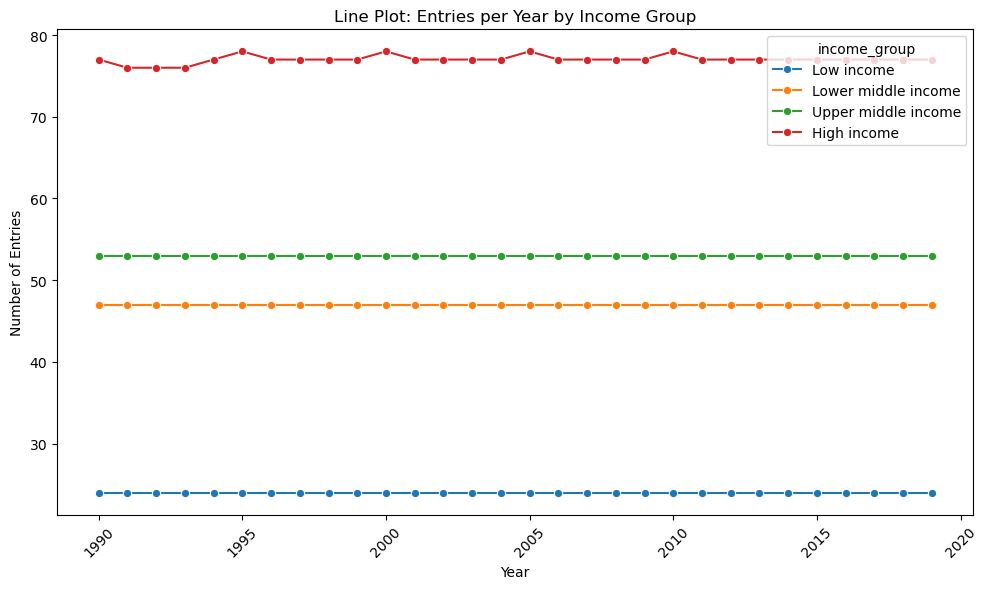

In [9]:
# Line plot (with multiple lines for each income group)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='entries', hue='income_group', hue_order=income_group_order, marker='o')
plt.title('Line Plot: Entries per Year by Income Group')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pepare data for Analysis - RQ: Are CO2 Emissions and Individuals using Internet correlated?-If yes, how?

In [10]:
# Convert 'date' to datetime and extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Define the custom order for income groups
income_group_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

In [11]:
print(df.columns)

Index(['country', 'date', 'agricultural_land', 'access_to_electricity',
       'renewvable_energy_consumption', 'co2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual',
       'individuals_using_internet', 'gdp_current_us', 'birth_rate',
       'death_rate', 'life_expectancy_at_birth', 'population',
       'rural_population', 'income_group', 'region', 'year'],
      dtype='object')


In [12]:
#how many variables are missing
# Check for missing values in 'individuals_using_internet' and 'co2_emisions'
missing_individuals_using_internet = df['individuals_using_internet'].isna().sum()
missing_co2_emisions = df['co2_emisions'].isna().sum()
# Sum of missing values in 'individuals_using_internet' and 'co2_emisions'
total_missing = missing_individuals_using_internet + missing_co2_emisions

# Print the number of missing values for each column
print(f"Missing values in 'individuals_using_internet': {missing_individuals_using_internet}")
print(f"Missing values in 'co2_emisions': {missing_co2_emisions}")
print(f"Total missing values (both columns): {total_missing}")

# Print the total number of entries (rows) in the DataFrame
total_entries = df.shape[0]
print(f"Total number of entries: {total_entries}")

Missing values in 'individuals_using_internet': 431
Missing values in 'co2_emisions': 572
Total missing values (both columns): 1003
Total number of entries: 6031


In [13]:
# dropping nan values from
df = df.dropna(subset=['co2_emisions','individuals_using_internet'])
df.shape

(5247, 19)

# Testing normality: CO2 Emissions

<Axes: xlabel='co2_emisions', ylabel='Count'>

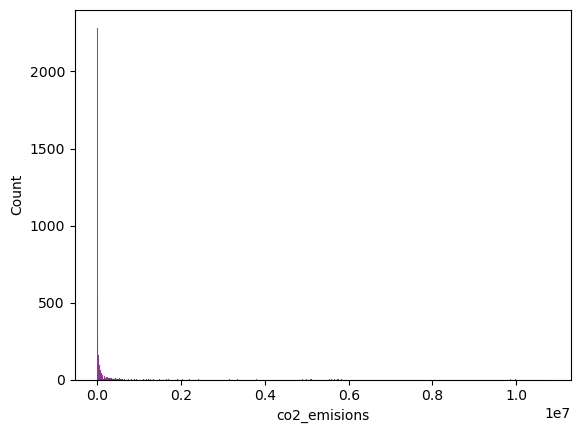

In [14]:
#first a histogram
sns.histplot(df["co2_emisions"], color="purple")

In [15]:
#let's apply the test
#Ho: the data is normally distributed
stats.shapiro(df["co2_emisions"])

ShapiroResult(statistic=np.float64(0.1995980658114307), pvalue=np.float64(6.553788570736861e-92))

In [16]:
#now with penguin
pg.normality(df["co2_emisions"])

,W,pval,normal
co2_emisions,0.199598,6.553789e-92,False


In [17]:
# what happens if we transform the data.
#square-root transformation
co2_emisions_sqrt = np.sqrt(df["co2_emisions"])

In [18]:
#natural log transformation
co2_emisions_log = np.log(df["co2_emisions"])

/opt/homebrew/Caskroom/miniconda/base/envs/tutorial_asda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


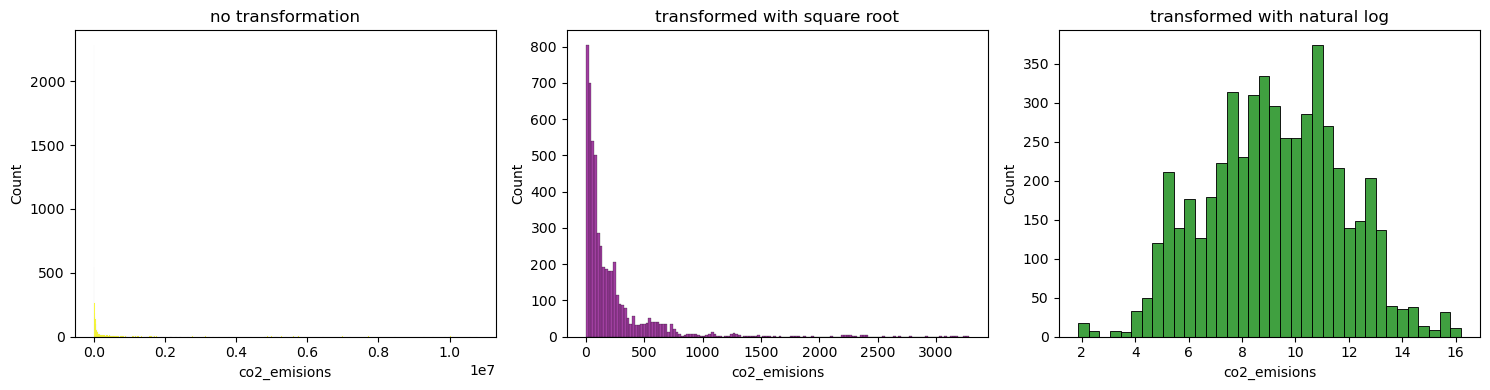

,W,pval,normal
co2_emisions,0.572386,6.113895e-78,False


In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ["yellow", "purple", "green"]

# Plot 1
sns.histplot(df["co2_emisions"], color=colors[0], ax=axes[0])
axes[0].set_title("no transformation")

# Plot 2 (square root)
sns.histplot(co2_emisions_sqrt, color=colors[1], ax=axes[1])
axes[1].set_title("transformed with square root")

# Plot 3 (natural log)
sns.histplot(co2_emisions_log, color=colors[2], ax=axes[2])
axes[2].set_title("transformed with natural log")

plt.tight_layout()
plt.show()

#now with penguin
pg.normality(co2_emisions_sqrt)

# Testing normality: Individuals using internet

/opt/homebrew/Caskroom/miniconda/base/envs/tutorial_asda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


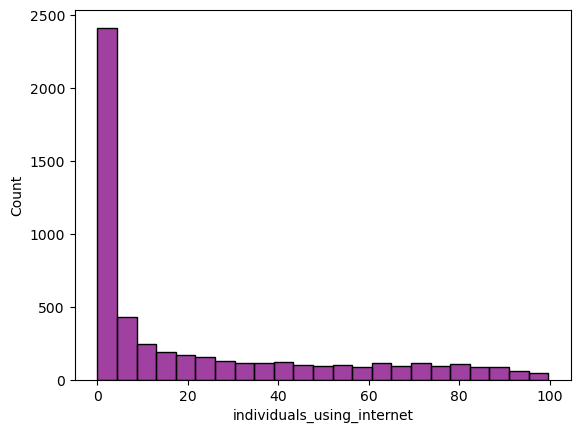

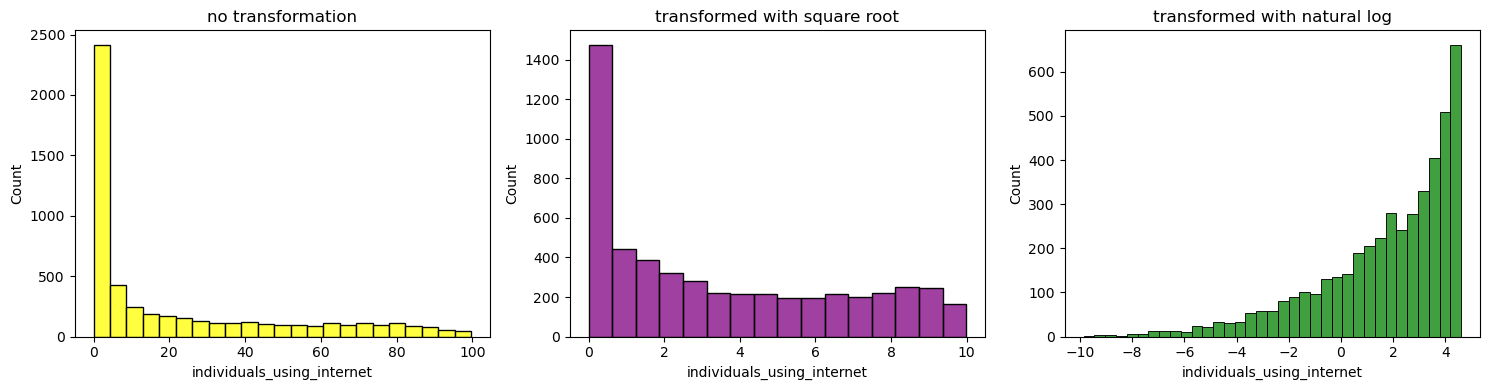

,W,pval,normal
individuals_using_internet,0.881841,5.885336e-53,False


In [20]:
# first a histogram
sns.histplot(df["individuals_using_internet"], color="purple")

# let's apply the test
# Ho: the data is normally distributed
stats.shapiro(df["individuals_using_internet"])

# now with pingouin
pg.normality(df["individuals_using_internet"])

# what happens if we transform the data.
# square-root transformation
internet_sqrt = np.sqrt(df["individuals_using_internet"])

# natural log transformation
internet_log = np.log(df["individuals_using_internet"])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ["yellow", "purple", "green"]

# Plot 1
sns.histplot(df["individuals_using_internet"], color=colors[0], ax=axes[0])
axes[0].set_title("no transformation")

# Plot 2 (square root)
sns.histplot(internet_sqrt, color=colors[1], ax=axes[1])
axes[1].set_title("transformed with square root")

# Plot 3 (natural log)
sns.histplot(internet_log, color=colors[2], ax=axes[2])
axes[2].set_title("transformed with natural log")

plt.tight_layout()
plt.show()

# now with penguin
pg.normality(internet_sqrt)

# Correlation test

Outlier in CO2 emissions:
      country       date  agricultural_land  access_to_electricity  \
1170   China 2019-01-01          55.462649                  100.0   

      renewvable_energy_consumption  co2_emisions  other_greenhouse_emisions  \
1170                          14.33    10762824.0                12732245.13   

      population_density  inflation_annual  individuals_using_internet  \
1170           149.94818          2.899234                   64.080881   

      gdp_current_us  birth_rate  death_rate  life_expectancy_at_birth  \
1170    1.427997e+13       10.41        7.09                    77.968   

        population  rural_population         income_group  \
1170  1.407745e+09       558762145.0  Upper middle income   

                   region  year  
1170  East Asia & Pacific  2019  
Outlier in individuals using internet:
      country       date  agricultural_land  access_to_electricity  \
389  Bahrain 2019-01-01          10.384615                  100.0   

     

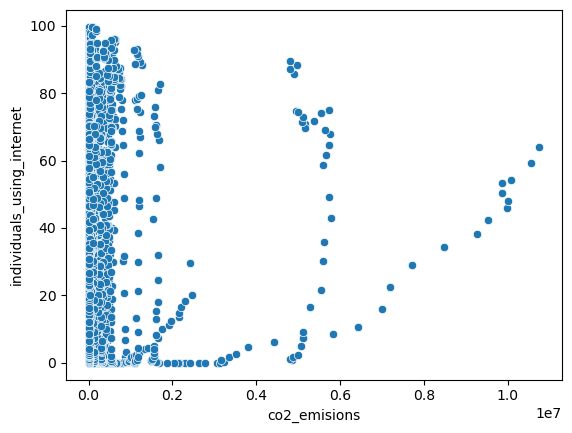

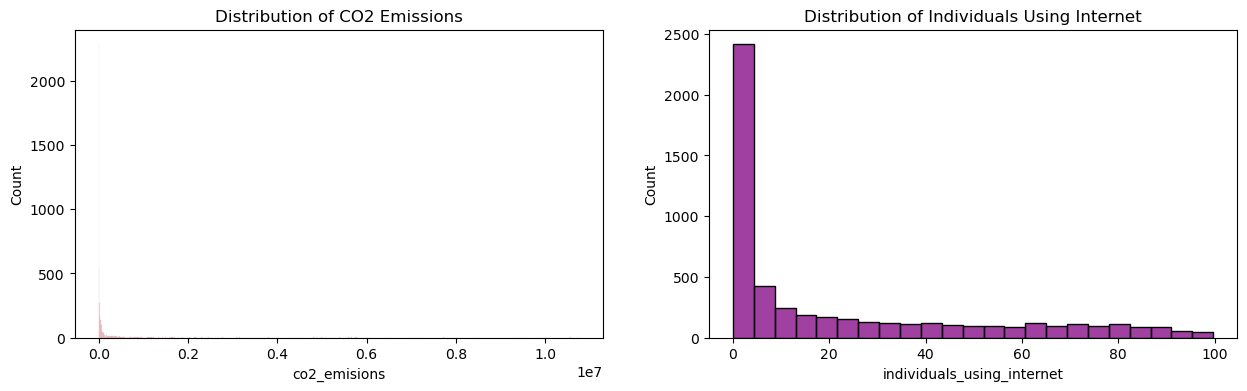

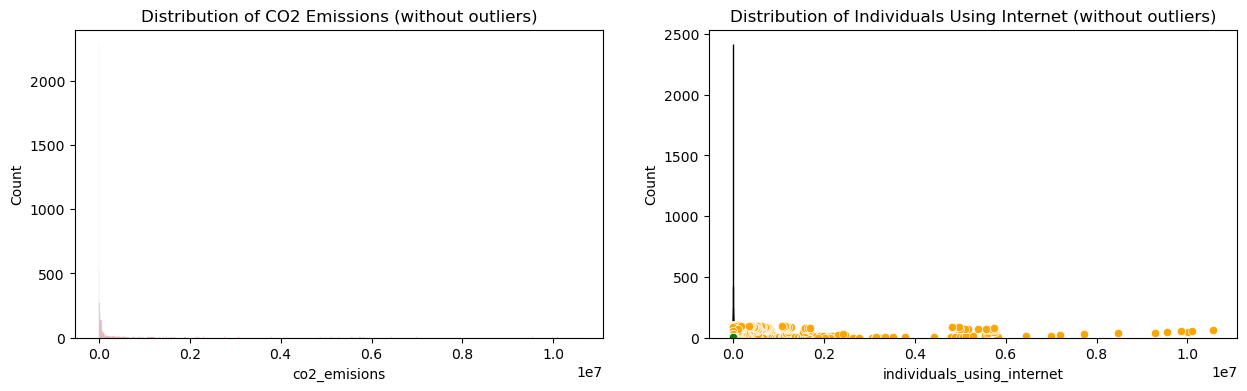

In [21]:

# Scatter plot to check the relationship between CO2 emissions and internet usage
sns.scatterplot(data=df, x="co2_emisions", y="individuals_using_internet")

# Create histograms for both variables
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
colors = ["pink", "purple"]

# Plot 1 (distribution of CO2 emissions)
sns.histplot(df["co2_emisions"], color=colors[0], ax=axes[0])
axes[0].set_title("Distribution of CO2 Emissions")

# Plot 2 (distribution of internet usage)
sns.histplot(df["individuals_using_internet"], color=colors[1], ax=axes[1])
axes[1].set_title("Distribution of Individuals Using Internet")

# Checking outliers in CO2 emissions and individuals using internet
outlier_co2 = df[df["co2_emisions"] == df["co2_emisions"].max()]
outlier_internet = df[df["individuals_using_internet"] == df["individuals_using_internet"].max()]

print("Outlier in CO2 emissions:\n", outlier_co2)
print("Outlier in individuals using internet:\n", outlier_internet)

# Removing outliers
new_df = df.copy()
condition1 = df["individuals_using_internet"] < df["individuals_using_internet"].max()
condition2 = df["co2_emisions"] < df["co2_emisions"].max()
new_df = new_df.loc[condition1 & condition2]

print("Original shape:", df.shape)
print("New shape without outliers:", new_df.shape)

# Replot the distributions without outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot 1 (distribution of CO2 emissions without outliers)
sns.histplot(new_df["co2_emisions"], color=colors[0], ax=axes[0])
axes[0].set_title("Distribution of CO2 Emissions (without outliers)")

# Plot 2 (distribution of individuals using internet without outliers)
sns.histplot(new_df["individuals_using_internet"], color=colors[1], ax=axes[1])
axes[1].set_title("Distribution of Individuals Using Internet (without outliers)")

# Testing normality for CO2 emissions and individuals using internet
print("\nNormality Test for CO2 emissions:")
print(pg.normality(new_df["co2_emisions"]))

print("\nNormality Test for Individuals Using Internet:")
print(pg.normality(new_df["individuals_using_internet"]))

# Scatter plot after removing outliers
sns.scatterplot(data=new_df, x="co2_emisions", y="individuals_using_internet", color="orange")

# Running Spearman correlation test

# With outliers
print("\nSpearman Correlation with Outliers:")
print(pg.corr(df["co2_emisions"], df["individuals_using_internet"], method="spearman"))

# Without outliers
print("\nSpearman Correlation without Outliers:")
print(pg.corr(new_df["co2_emisions"], new_df["individuals_using_internet"], method="spearman"))

# With log transformation
new_df["log_co2_emisions"] = np.log(new_df["co2_emisions"] + 1)  # log transform to avoid log(0)
new_df["log_individuals_using_internet"] = np.log(new_df["individuals_using_internet"] + 1)  # log transform to avoid log(0)

# Scatter plot after log transformation
sns.scatterplot(data=new_df, x="log_co2_emisions", y="log_individuals_using_internet", color="green")

# Spearman correlation test after log transformation
print("\nSpearman Correlation after Log Transformation:")
print(pg.corr(new_df["log_co2_emisions"], new_df["log_individuals_using_internet"], method="spearman"))

# Plots: CO2 Emissions vs Individuals using Internet

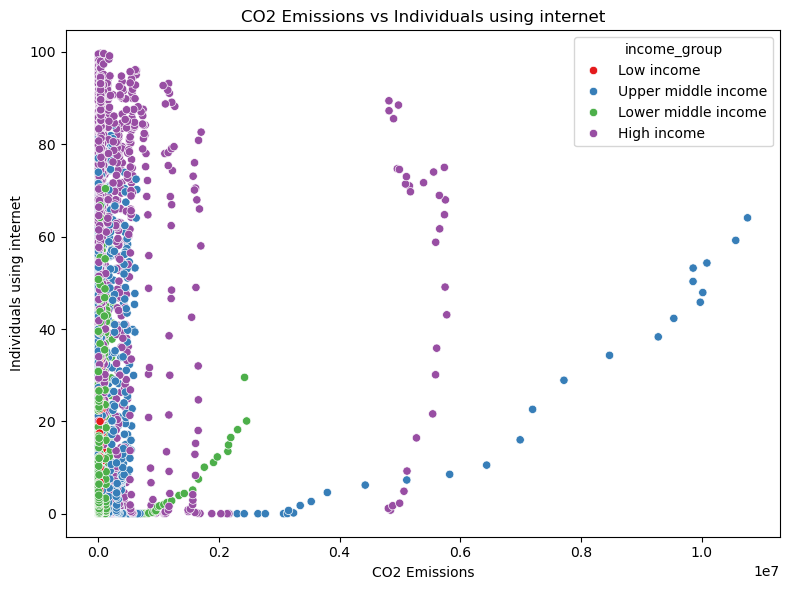

In [22]:
# Scatter plot: CO2 Emissions vs Individuals using internet => Countries with higher access to electricity tend to have higher life expectancy.
plt.figure(figsize=(8,6))
sns.scatterplot(data =df, x='co2_emisions', y='individuals_using_internet', hue='income_group', palette='Set1')
plt.title('CO2 Emissions vs Individuals using internet')
plt.xlabel('CO2 Emissions')
plt.ylabel('Individuals using internet')
plt.tight_layout()
plt.show()

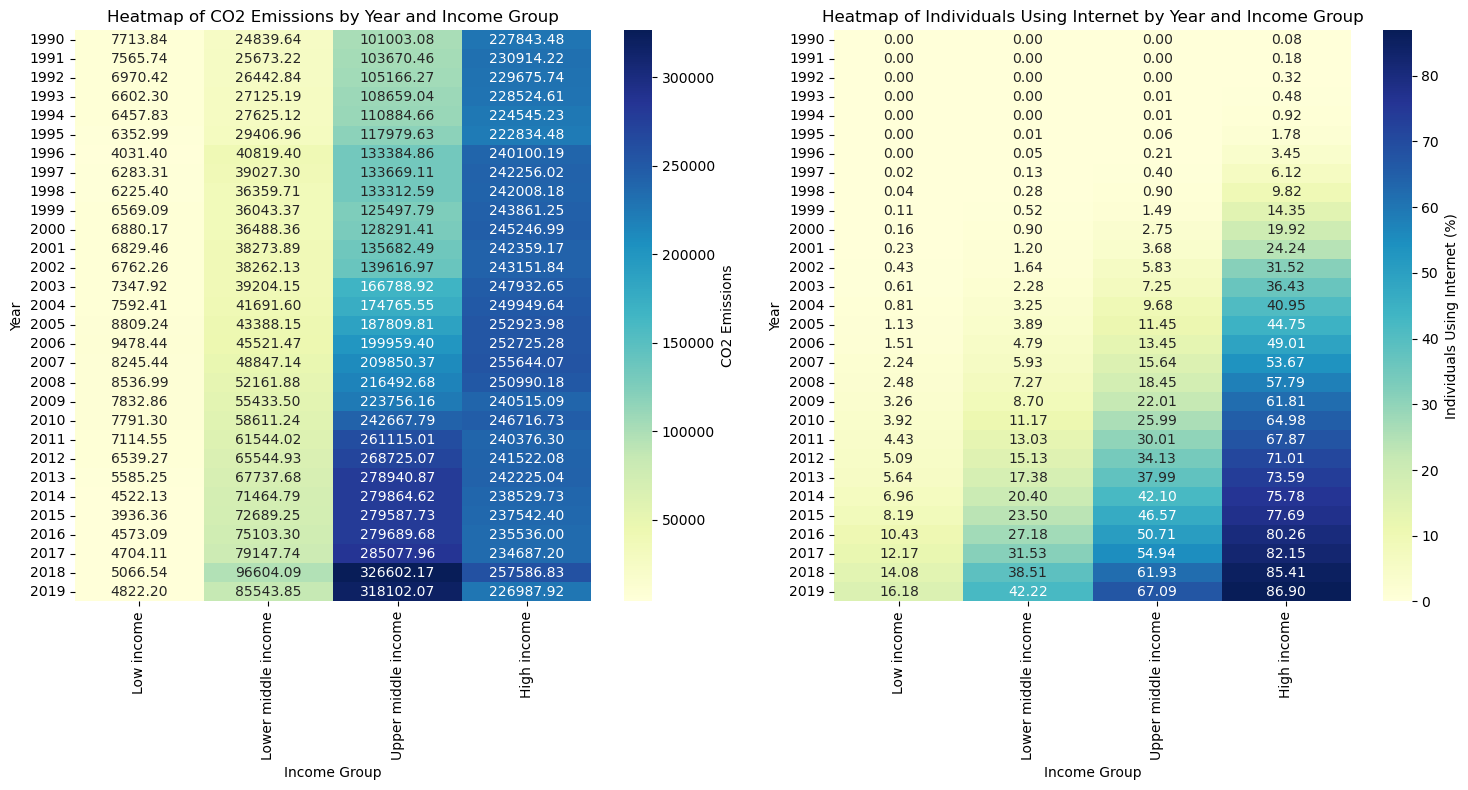

In [23]:
# Pivot the data for co2_emisions heatmap
co2_heatmap_data = df.pivot_table(index='year', columns='income_group', values='co2_emisions')
co2_heatmap_data = co2_heatmap_data[income_group_order]

# Pivot the data for individuals_using_internet heatmap
internet_heatmap_data = df.pivot_table(index='year', columns='income_group', values='individuals_using_internet')
internet_heatmap_data = internet_heatmap_data[income_group_order]

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Heatmap for CO2 emissions
sns.heatmap(co2_heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'CO2 Emissions'}, fmt=".2f", ax=axes[0])
axes[0].set_title('Heatmap of CO2 Emissions by Year and Income Group')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Year')

# Heatmap for Individuals Using Internet
sns.heatmap(internet_heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Individuals Using Internet (%)'}, fmt=".2f", ax=axes[1])
axes[1].set_title('Heatmap of Individuals Using Internet by Year and Income Group')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Year')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

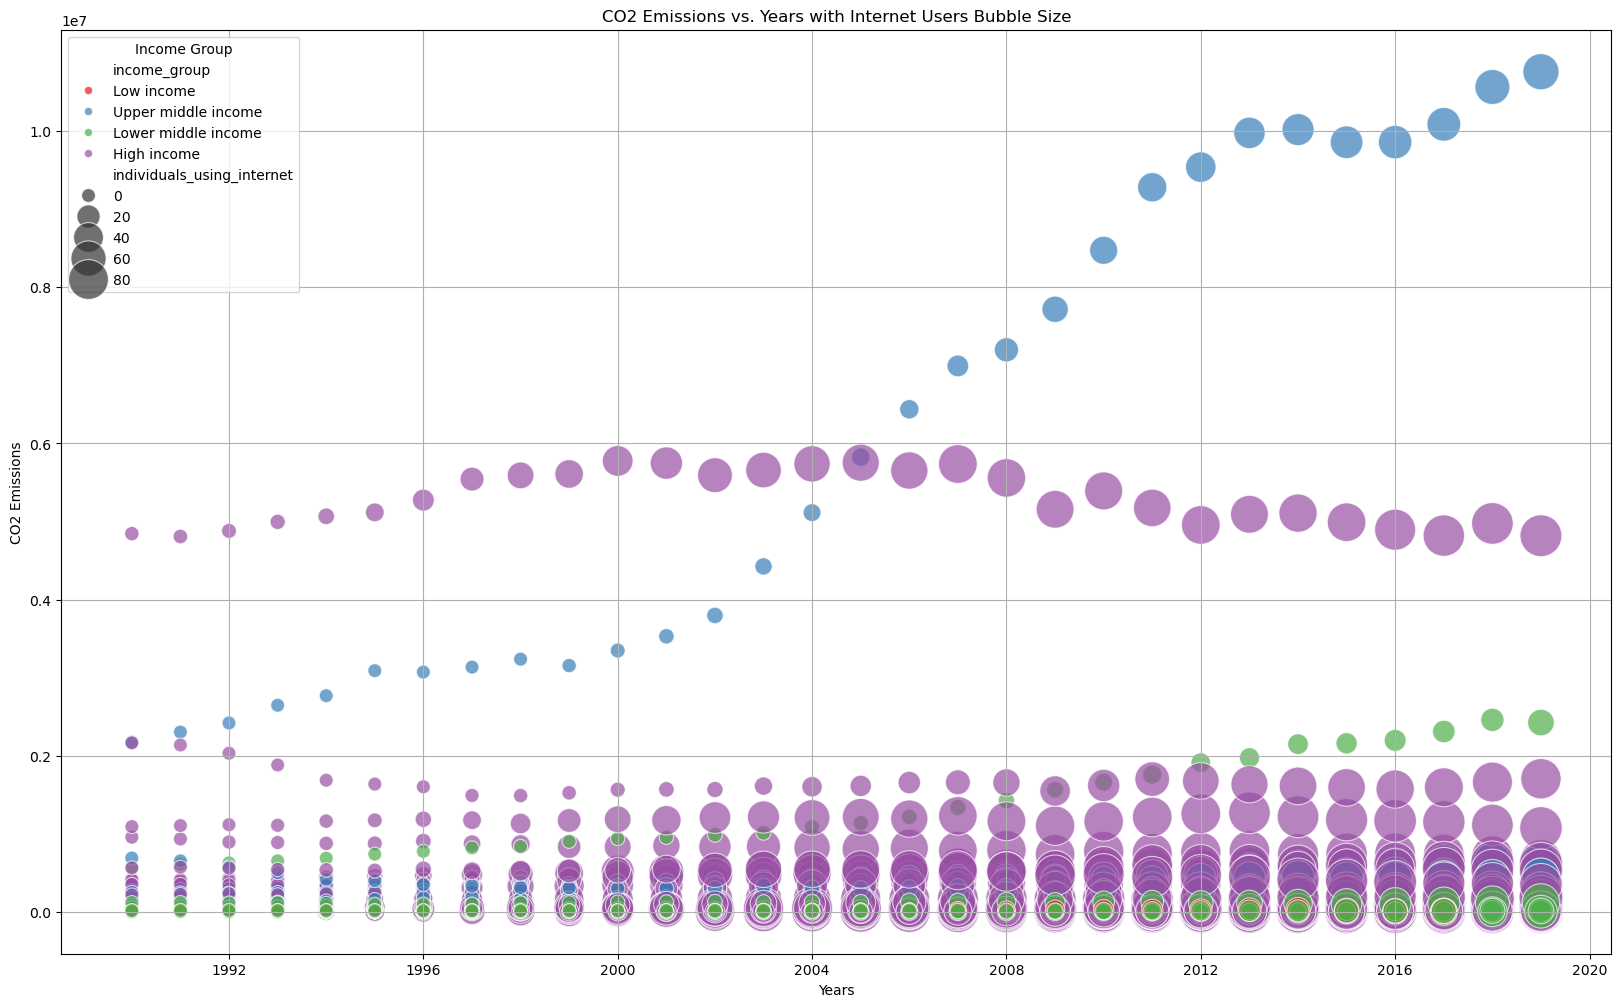

In [24]:


# Create a bubble plot
plt.figure(figsize=(20, 12))

# Scatter plot with bubble sizes and colors
sns.scatterplot(data=df, x='date', y='co2_emisions',
                size='individuals_using_internet', hue='income_group',
                sizes=(100, 1000), palette='Set1', alpha=0.7)

# Customize plot
plt.title('CO2 Emissions vs. Years with Internet Users Bubble Size')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.legend(title='Income Group')
plt.grid(True)

# Show the plot
plt.show()

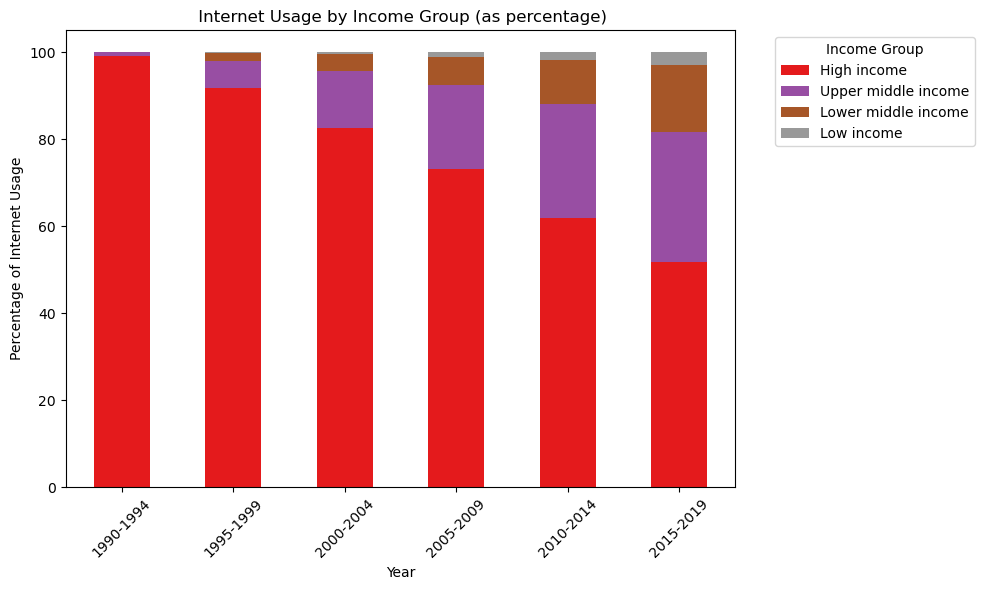

In [25]:
# Create a new column to define the 5-year intervals
df['year_group'] = (df['year'] // 5) * 5

# Sum CO2 emissions and internet usage by year group and income group
grouped = df.groupby(['year_group', 'income_group']).agg(
    total_internet_usage=('individuals_using_internet', 'sum')
).reset_index()

# Pivot the data for stacking purposes
pivot_df = grouped.pivot_table(
    values='total_internet_usage',
    index='year_group',
    columns='income_group',
    aggfunc='sum',
    fill_value=0
)

# Define the specific order for the income groups (from low income to high income)
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

# Reorder columns based on the specified income group order
pivot_df = pivot_df[income_order]

# Normalize the internet usage to get percentage values
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a proportional stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot with proportional filling
pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, colormap='Set1')

# Add labels and title
plt.title(' Internet Usage by Income Group (as percentage)')
plt.xlabel('Year')
plt.ylabel('Percentage of Internet Usage')
plt.xticks(range(len(pivot_df_percentage)), [f'{year}-{year+4}' for year in pivot_df_percentage.index], rotation=45)
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

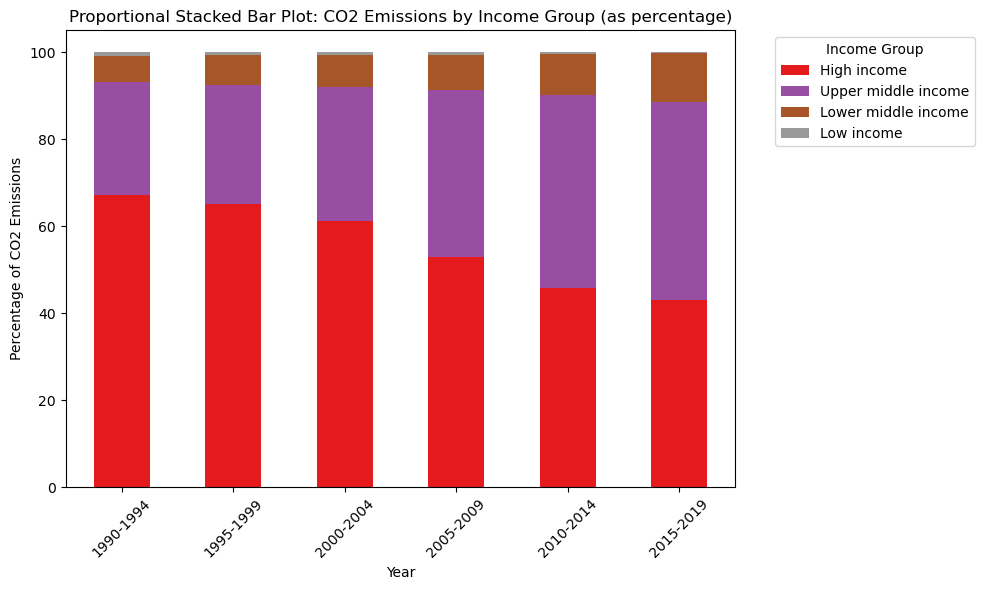

In [26]:
# Create a new column to define the 5-year intervals
df['year_group'] = (df['year'] // 5) * 5

# Sum CO2 emissions by year group and income group
grouped = df.groupby(['year_group', 'income_group']).agg(
    total_co2_emisions=('co2_emisions', 'sum')
).reset_index()

# Pivot the data for stacking purposes
pivot_df = grouped.pivot_table(
    values='total_co2_emisions',
    index='year_group',
    columns='income_group',
    aggfunc='sum',
    fill_value=0
)

# Define the specific order for the income groups (from low income to high income)
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

# Reorder columns based on the specified income group order
pivot_df = pivot_df[income_order]

# Normalize the CO2 emissions to get percentage values (each bar will sum to 100%)
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a proportional stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot with proportional filling
pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, colormap='Set1')

# Add labels and title
plt.title('Proportional Stacked Bar Plot: CO2 Emissions by Income Group (as percentage)')
plt.xlabel('Year')
plt.ylabel('Percentage of CO2 Emissions')
plt.xticks(range(len(pivot_df_percentage)), [f'{year}-{year+4}' for year in pivot_df_percentage.index], rotation=45)
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

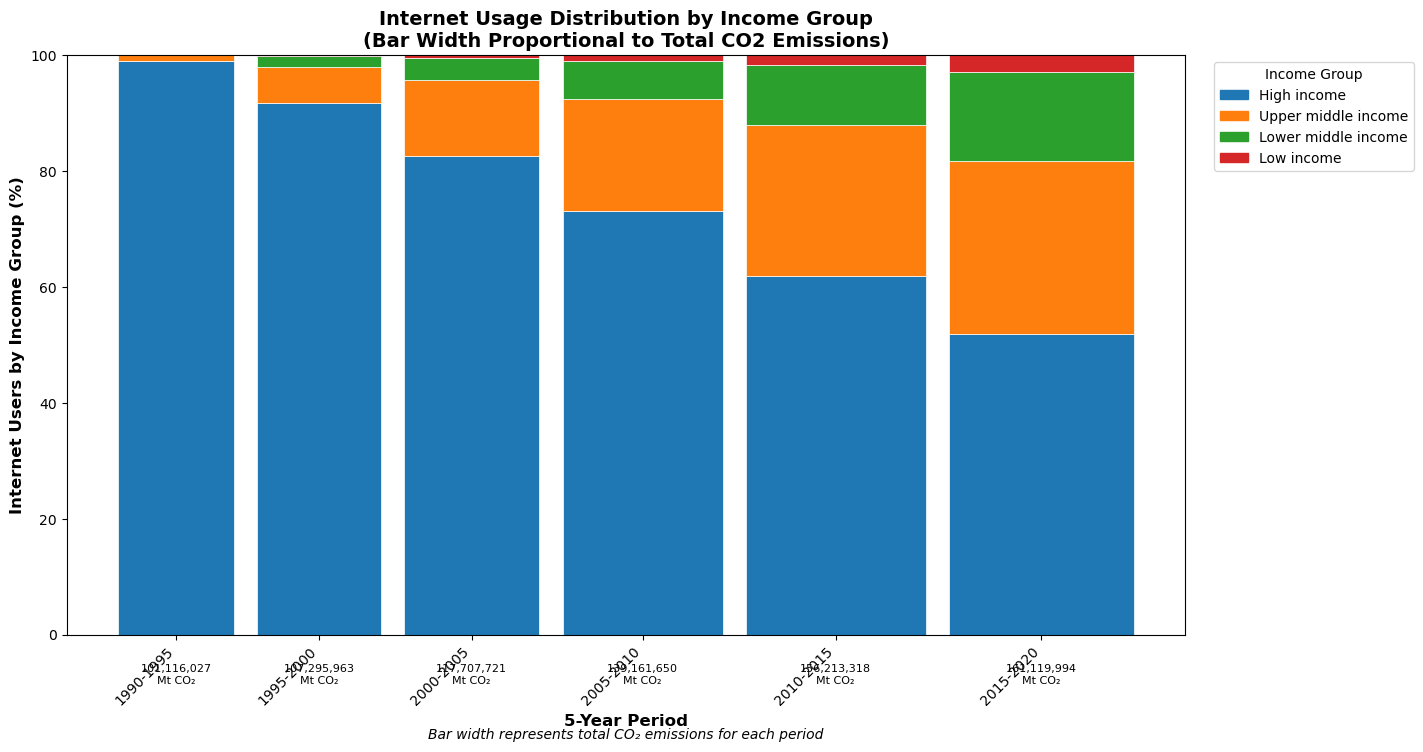

In [27]:
## this is not working: proportianal box plots and adding another parameter is not working!!

# Define the specific order for the income groups (from low income to high income)
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

# Create a new column to define the 5-year intervals
df['year_group'] = (df['year'] // 5) * 5

# Define colors for each income group
colors = {
    'High income': '#1f77b4',
    'Upper middle income': '#ff7f0e',
    'Lower middle income': '#2ca02c',
    'Low income': '#d62728'
}

# Get unique year groups in order
year_groups = sorted(df['year_group'].unique())

# Create period labels for display (e.g., "1990-1995")
period_labels = {yg: f"{yg}-{yg+5}" for yg in year_groups}

# Calculate total CO2 emissions per year_group (for bar width)
co2_per_period = df.groupby('year_group')['co2_emisions'].sum().reindex(year_groups)

# Normalize widths (scale to reasonable bar widths)
max_width = 0.8
normalized_widths = (co2_per_period / co2_per_period.max()) * max_width

# Calculate x positions for bars (cumulative widths with gaps)
gap = 0.1
x_positions = []
cumulative_x = 0
for i, yg in enumerate(year_groups):
    x_positions.append(cumulative_x + normalized_widths[yg] / 2)
    cumulative_x += normalized_widths[yg] + gap

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# For each year_group, calculate percentage and create stacked bars
for i, yg in enumerate(year_groups):
    period_data = df[df['year_group'] == yg].copy()

    # Aggregate data by income_group within this year_group
    period_agg = period_data.groupby('income_group').agg({
        'individuals_using_internet': 'sum'
    }).reset_index()

    # Calculate total internet users for this year_group
    total_internet = period_agg['individuals_using_internet'].sum()

    # Calculate percentage for each income group
    period_agg['percentage'] = (period_agg['individuals_using_internet'] / total_internet) * 100

    # Reorder by income_order
    period_agg['income_group'] = pd.Categorical(period_agg['income_group'], categories=income_order, ordered=True)
    period_agg = period_agg.sort_values('income_group')

    # Draw stacked bars
    bottom = 0
    for _, row in period_agg.iterrows():
        ax.bar(x_positions[i], row['percentage'],
               width=normalized_widths[yg],
               bottom=bottom,
               color=colors[row['income_group']],
               edgecolor='white',
               linewidth=0.5)
        bottom += row['percentage']

# Customize the plot
ax.set_xlabel('5-Year Period', fontsize=12, fontweight='bold')
ax.set_ylabel('Internet Users by Income Group (%)', fontsize=12, fontweight='bold')
ax.set_title('Internet Usage Distribution by Income Group\n(Bar Width Proportional to Total CO2 Emissions)',
             fontsize=14, fontweight='bold')

# Set x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels([period_labels[yg] for yg in year_groups], rotation=45, ha='right')

# Set y-axis limits
ax.set_ylim(0, 100)

# Create legend
legend_patches = [mpatches.Patch(color=colors[group], label=group) for group in income_order]
ax.legend(handles=legend_patches, title='Income Group', loc='upper left', bbox_to_anchor=(1.02, 1))

# Add CO2 emissions annotation below each bar
for i, yg in enumerate(year_groups):
    ax.annotate(f'{co2_per_period[yg]:,.0f}\nMt CO₂',
                xy=(x_positions[i], -5),
                ha='center', va='top', fontsize=8,
                annotation_clip=False)

# Add note about bar width
ax.text(0.5, -0.18, 'Bar width represents total CO₂ emissions for each period',
        transform=ax.transAxes, ha='center', fontsize=10, style='italic')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, right=0.85)

plt.show()

# Statistical Diagnostics of GDP and Agricultural Land: Normality Tests, Data Transformations, and Correlation Analysis

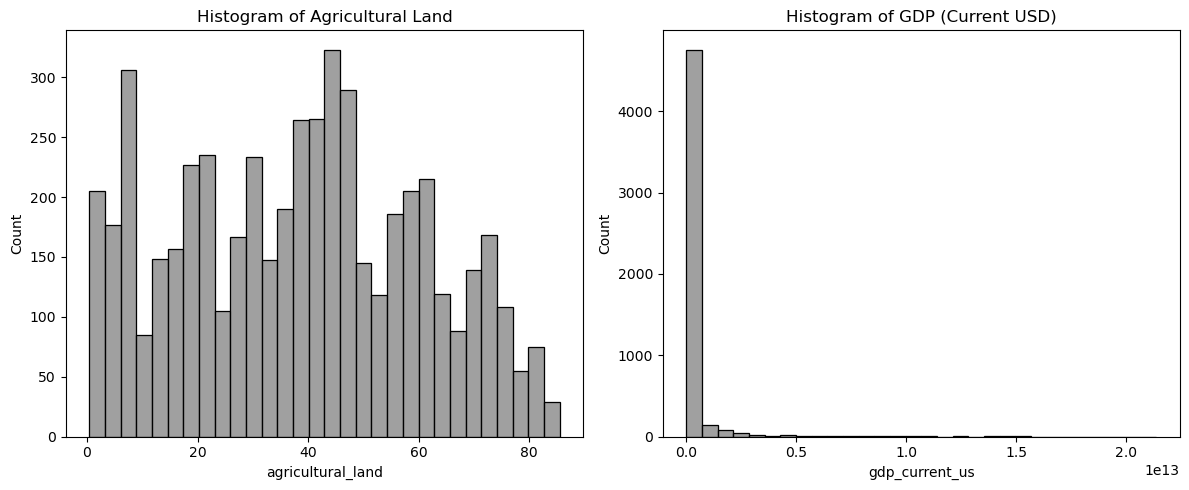

In [28]:
#Histograms


plt.figure(figsize=(12, 5))

# 1. Histogram for Agricultural Land
plt.subplot(1, 2, 1)
sns.histplot(df["agricultural_land"], color="grey", bins=30)
plt.title("Histogram of Agricultural Land")

# 2. Histogram for GDP Current USD
plt.subplot(1, 2, 2)
sns.histplot(df["gdp_current_us"], color="grey", bins=30)
plt.title("Histogram of GDP (Current USD)")

plt.tight_layout()
plt.show()



In [29]:
#make normality test

df_norm_original = pd.DataFrame({
    "gdp_current_us": df["gdp_current_us"],
    "agricultural_land": df["agricultural_land"],
})

pg.normality(df_norm_original)


,W,pval,normal
gdp_current_us,0.215344,7.236542e-91,False
agricultural_land,0.971196,4.963919e-31,False


# make log and sqrt transformations

In [30]:
df_t = df.copy()
#natural log transformation

agricultural_land_log = np.log(df_t["agricultural_land"] + 1)
gdp_current_us_log = np.log(df_t["gdp_current_us"] + 1)

# square-root transformation
agricultural_land_sqrt = np.sqrt(df_t["agricultural_land"])
gdp_current_us_sqrt = np.sqrt(df_t["gdp_current_us"])

df_t["agricultural_land_log"] = agricultural_land_log
df_t["gdp_current_us_log"] = gdp_current_us_log

df_t["agricultural_land_sqrt"] = agricultural_land_sqrt
df_t["gdp_current_us_sqrt"] = gdp_current_us_sqrt

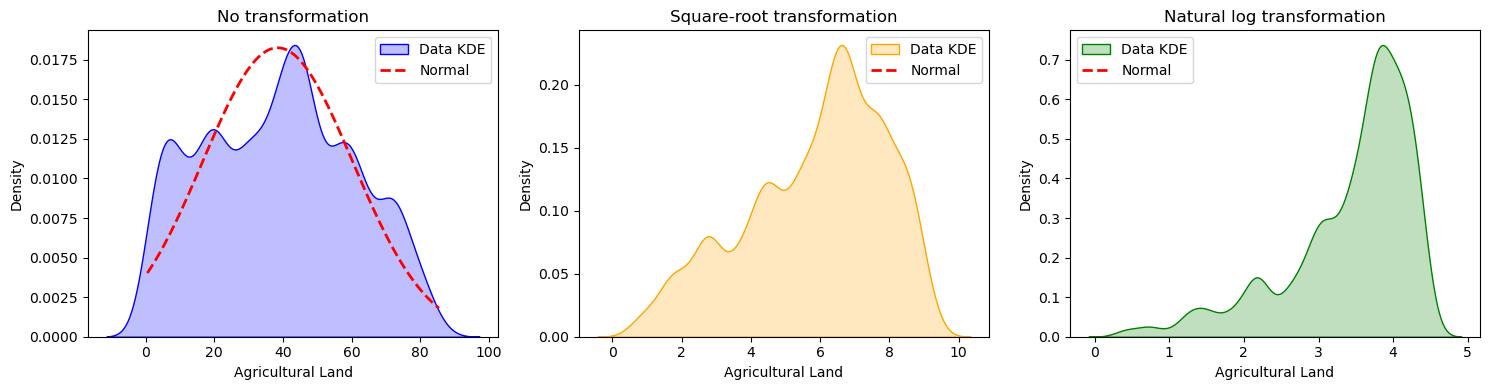

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ["blue", "orange", "green"]

# Prepare data
data_list = [df["agricultural_land"].dropna(), agricultural_land_sqrt, agricultural_land_log]
titles = ["No transformation", "Square-root transformation", "Natural log transformation"]

for i, data in enumerate(data_list):
    data = np.array(data)  # ensure it's a numpy array
    mu, sigma = np.mean(data), np.std(data)

    # KDE plot
    sns.kdeplot(data, fill=True, color=colors[i], ax=axes[i], label='Data KDE')

    # Normal distribution overlay
    x = np.linspace(min(data), max(data), 1000)
    axes[i].plot(x, norm.pdf(x, mu, sigma), 'r', linestyle='--', linewidth=2, label='Normal')

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Agricultural Land")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()

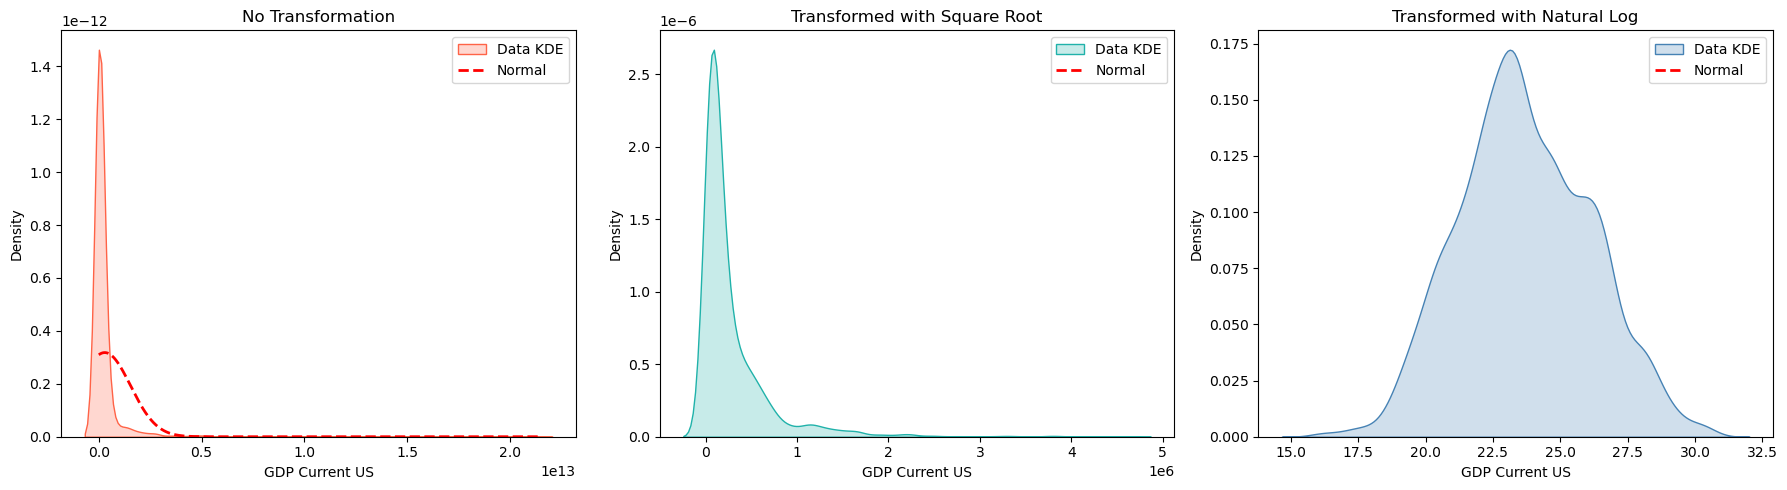

In [32]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

data_list = [df["gdp_current_us"].dropna(), gdp_current_us_sqrt, gdp_current_us_log]
titles = ["No Transformation", "Transformed with Square Root", "Transformed with Natural Log"]
colors = ['tomato', 'lightseagreen', 'steelblue']

for i, data in enumerate(data_list):
    data = np.array(data)  # ensure it's numpy array
    mu, sigma = np.mean(data), np.std(data)

    # KDE plot
    sns.kdeplot(data, fill=True, color=colors[i], ax=axes[i], label='Data KDE')

    # Normal curve overlay
    x = np.linspace(min(data), max(data), 1000)
    axes[i].plot(x, norm.pdf(x, mu, sigma), 'r', linestyle='--', linewidth=2, label='Normal')

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("GDP Current US")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [33]:
#normallity test for transformed variables
df_norm_transformed = pd.DataFrame({
    "gdp_current_us_log": gdp_current_us_log,
    "agricultural_land_sqrt": agricultural_land_sqrt,
})

pg.normality(df_norm_transformed)


,W,pval,normal
gdp_current_us_log,0.996475,1.074387e-09,False
agricultural_land_sqrt,0.957033,1.449963e-36,False


#removing outliers

In [34]:
df_t[df_t["agricultural_land_sqrt"] == df_t["agricultural_land_sqrt"].max()]

,country,date,agricultural_land,access_to_electricity,renewvable_energy_consumption,co2_emisions,other_greenhouse_emisions,population_density,inflation_annual,individuals_using_internet,...,population,rural_population,income_group,region,year,year_group,agricultural_land_log,gdp_current_us_log,agricultural_land_sqrt,gdp_current_us_sqrt
5802,Uruguay,2001-01-01,85.487373,97.726013,41.63,4946.3,31896.25416,18.860353,4.359341,11.121438,...,3300939.0,254073.0,High income,Latin America & Caribbean,2001,2000,4.459998,23.762956,9.245938,144564.040281


In [35]:
df_t[df_t["gdp_current_us_log"] == df_t["gdp_current_us_log"].max()]

,country,date,agricultural_land,access_to_electricity,renewvable_energy_consumption,co2_emisions,other_greenhouse_emisions,population_density,inflation_annual,individuals_using_internet,...,population,rural_population,income_group,region,year,year_group,agricultural_land_log,gdp_current_us_log,agricultural_land_sqrt,gdp_current_us_sqrt
5790,United States,2019-01-01,44.363367,100.0,10.42,4817710.4,6039739.492,35.893176,1.81221,89.430285,...,328329953.0,57592357.0,High income,North America,2019,2015,3.814705,30.693523,6.660583,4.623957e+06


In [36]:
## Removing outliers
# Make a copy
new_df = df_t.copy()

# Conditions: exclude rows with the maximum value
condition1 = df_t["agricultural_land_sqrt"] < df_t["agricultural_land_sqrt"].max()
condition2 = df_t["gdp_current_us_log"] < df_t["gdp_current_us_log"].max()

# Apply both conditions
new_df = new_df.loc[condition1 & condition2]


# Checking Distribution After Transformation and Outlier Removal

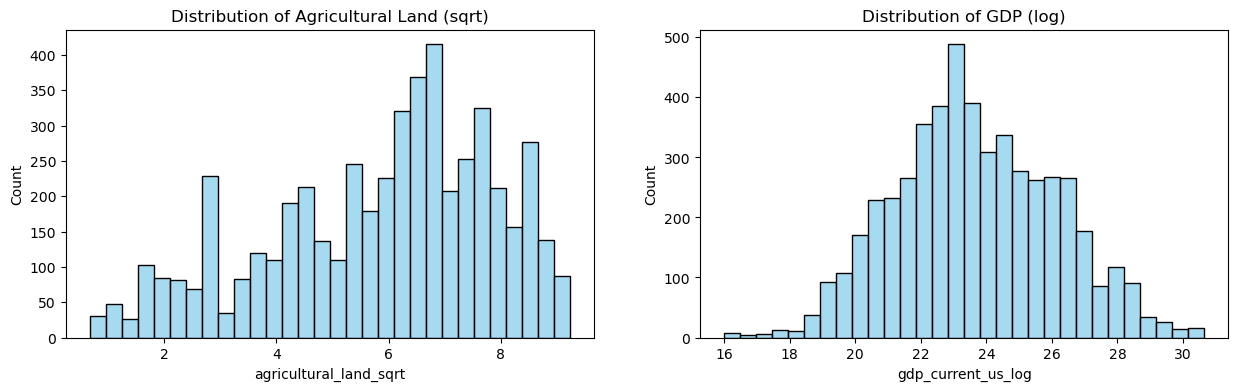

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
colors = ["skyblue", "skyblue"]

# Plot 1: Agricultural Land (sqrt)
sns.histplot(new_df["agricultural_land_sqrt"], color=colors[0], ax=axes[0], bins=30)
axes[0].set_title("Distribution of Agricultural Land (sqrt)")

# Plot 2: GDP (log)
sns.histplot(new_df["gdp_current_us_log"], color=colors[1], ax=axes[1], bins=30)
axes[1].set_title("Distribution of GDP (log)")

plt.show()


In [38]:
# Create a DataFrame with transformed variables
df_norm = pd.DataFrame({
    "gdp_current_us_log": new_df["gdp_current_us_log"],
    "agricultural_land_sqrt": new_df["agricultural_land_sqrt"]
})

# Run normality test for all columns at once
pg.normality(df_norm)


,W,pval,normal
gdp_current_us_log,0.996359,7.551639e-10,False
agricultural_land_sqrt,0.955195,7.012154e-37,False


#Comparison between original and tranformed variables

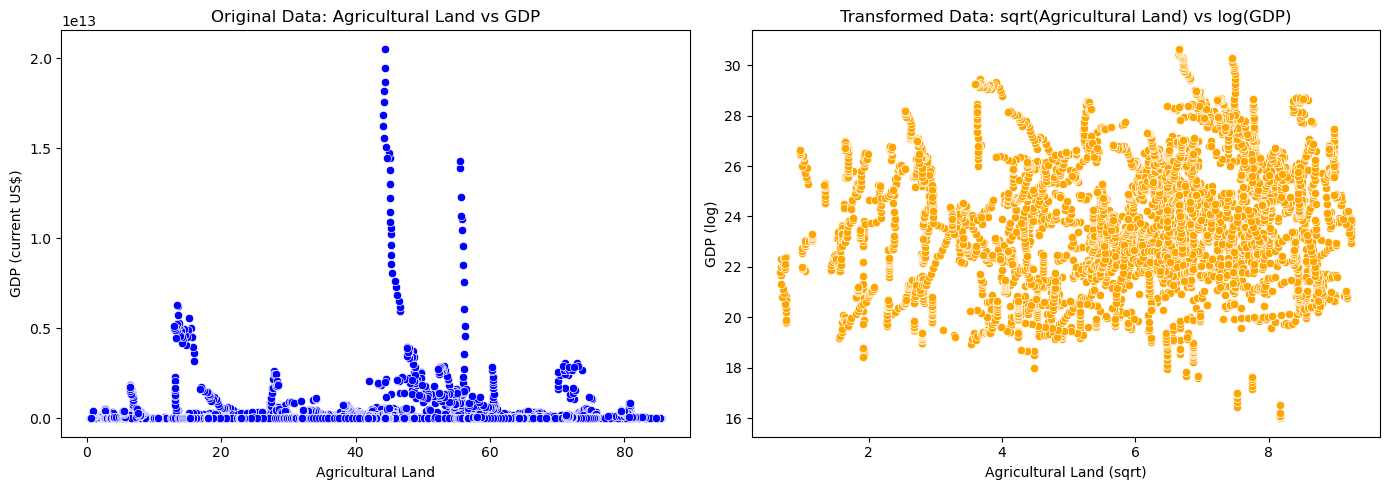

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- 1. Original data ---
sns.scatterplot(
    data=new_df,
    x="agricultural_land",      # only if exists
    y="gdp_current_us",         # only if exists
    color="blue",
    ax=axes[0]
)
axes[0].set_title("Original Data: Agricultural Land vs GDP")
axes[0].set_xlabel("Agricultural Land")
axes[0].set_ylabel("GDP (current US$)")

# --- 2. Transformed data ---
sns.scatterplot(
    data=new_df,
    x="agricultural_land_sqrt",
    y="gdp_current_us_log",
    color="orange",
    ax=axes[1]
)
axes[1].set_title("Transformed Data: sqrt(Agricultural Land) vs log(GDP)")
axes[1].set_xlabel("Agricultural Land (sqrt)")
axes[1].set_ylabel("GDP (log)")

plt.tight_layout()
plt.show()



In [40]:
#correlation before transformation

pg.corr(
    df["agricultural_land"],
    df["gdp_current_us"],
    method="spearman"
)

,n,r,CI95%,p-val,power
spearman,5076,0.127297,"[0.1, 0.15]",8.688727e-20,1.0


In [41]:
#correlation after transformation

pg.corr(
    new_df["agricultural_land_sqrt"],
    new_df["gdp_current_us_log"],
    method="spearman"
)

,n,r,CI95%,p-val,power
spearman,5074,0.12721,"[0.1, 0.15]",9.360484e-20,1.0


In [42]:
# correlations 

In [43]:
df.corr(numeric_only=True)

,agricultural_land,access_to_electricity,renewvable_energy_consumption,co2_emisions,other_greenhouse_emisions,population_density,inflation_annual,individuals_using_internet,gdp_current_us,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,year,year_group
agricultural_land,1.000000,-0.117494,0.044338,0.064859,0.071338,-0.089469,-0.011557,-0.107389,0.039651,0.034631,0.232692,-0.158217,0.117668,0.122080,0.003501,0.003013
access_to_electricity,-0.117494,1.000000,-0.782109,0.137220,0.134534,0.103028,0.014226,0.470074,0.155778,-0.846698,-0.423089,0.845109,0.039381,-0.015979,0.043098,0.044259
renewvable_energy_consumption,0.044338,-0.782109,1.000000,-0.144433,-0.136663,-0.153630,0.037607,-0.322002,-0.154597,0.677686,0.436320,-0.679303,-0.018716,0.028703,-0.040780,-0.041527
co2_emisions,0.064859,0.137220,-0.144433,1.000000,0.995974,-0.012217,-0.006469,0.114428,0.808052,-0.174951,-0.029789,0.145351,0.709684,0.550533,0.038099,0.037739
other_greenhouse_emisions,0.071338,0.134534,-0.136663,0.995974,1.000000,-0.014860,-0.004374,0.104764,0.793617,-0.169653,-0.031631,0.136830,0.752639,0.599354,0.037810,0.037436
population_density,-0.089469,0.103028,-0.153630,-0.012217,-0.014860,1.000000,-0.015179,0.127666,-0.000729,-0.146810,-0.141601,0.165174,0.012538,0.020216,0.037778,0.037394
inflation_annual,-0.011557,0.014226,0.037607,-0.006469,-0.004374,-0.015179,1.000000,-0.050072,-0.011251,0.044052,0.071791,-0.066742,0.000026,-0.001176,-0.078602,-0.082375
individuals_using_internet,-0.107389,0.470074,-0.322002,0.114428,0.104764,0.127666,-0.050072,1.000000,0.237294,-0.565648,-0.172880,0.606215,-0.010648,-0.059768,0.665859,0.657524
gdp_current_us,0.039651,0.155778,-0.154597,0.808052,0.793617,-0.000729,-0.011251,0.237294,1.000000,-0.207776,-0.021825,0.215160,0.411128,0.240638,0.090274,0.088869
birth_rate,0.034631,-0.846698,0.677686,-0.174951,-0.169653,-0.146810,0.044052,-0.565648,-0.207776,1.000000,0.305250,-0.858749,-0.067661,-0.014968,-0.218644,-0.215271


In [44]:
sns.set(style="whitegrid")
plt.rcParams.update({"figure.max_open_warning": 0})

In [45]:
# Data Inspection

In [46]:
# Inspect distributions
x = df["access_to_electricity"].dropna()
y = df["life_expectancy_at_birth"].dropna()

In [47]:
print("Access to electricity:")
print(x.describe())
print("Skew:", x.skew())

Access to electricity:
count    4584.000000
mean       78.447937
std        30.869557
min         0.533899
25%        62.266915
50%        97.700000
75%       100.000000
max       100.000000
Name: access_to_electricity, dtype: float64
Skew: -1.220910457361215


In [48]:
print("\nLife expectancy:")
print(y.describe())
print("Skew:", y.skew())


Life expectancy:
count    5247.000000
mean       68.398895
std         9.456376
min        14.098000
25%        62.544000
50%        70.518000
75%        75.438659
max        84.356341
Name: life_expectancy_at_birth, dtype: float64
Skew: -0.7674464277061386


In [49]:
# Normality tests
print("Access to electricity:", stats.shapiro(x))
print("Life expectancy:", stats.shapiro(y))

Access to electricity: ShapiroResult(statistic=np.float64(0.7184474390505113), pvalue=np.float64(2.4361177014160097e-66))
Life expectancy: ShapiroResult(statistic=np.float64(0.9468989039679371), pvalue=np.float64(6.520480143355461e-40))


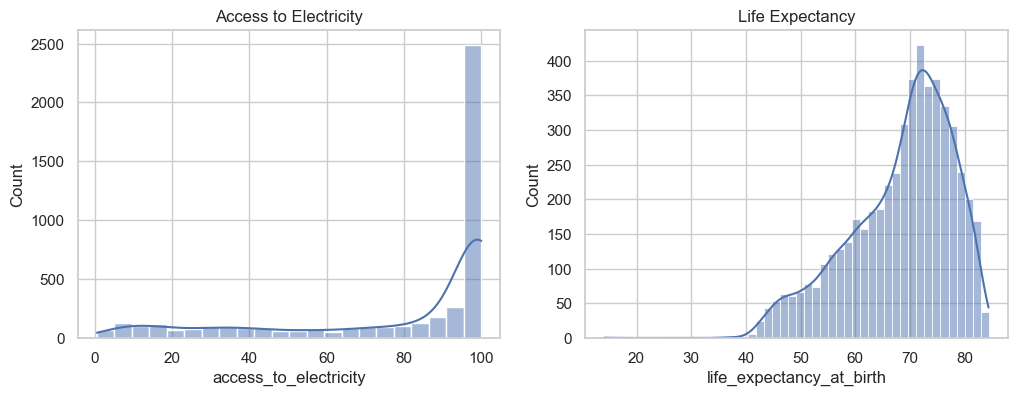

In [50]:
# Histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x, kde=True)
plt.title("Access to Electricity")

plt.subplot(1,2,2)
sns.histplot(y, kde=True)
plt.title("Life Expectancy")
plt.show()

In [51]:
# Scatter & Correlation Test

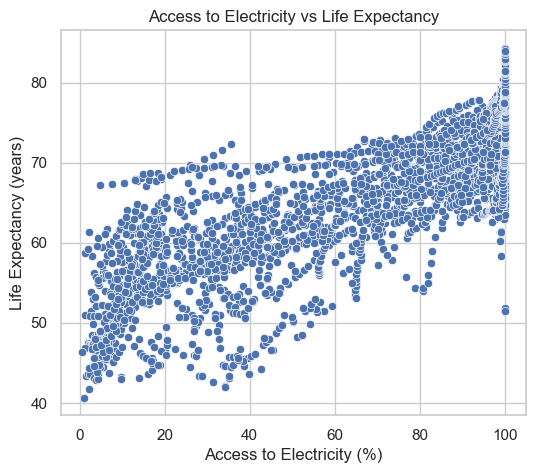

In [52]:
# Scatter plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["access_to_electricity"], y=df["life_expectancy_at_birth"])
plt.title("Access to Electricity vs Life Expectancy")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Life Expectancy (years)")
plt.show()

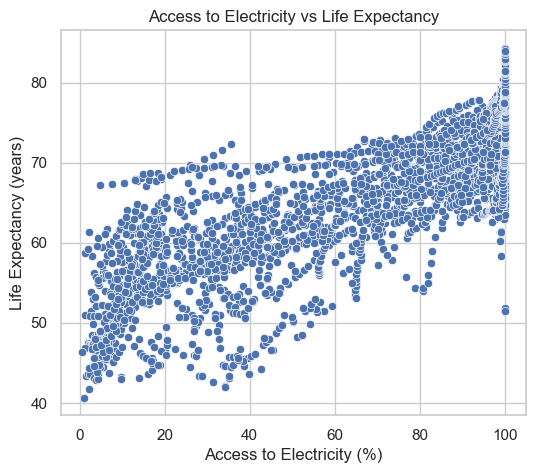


Correlation Test:
Spearman correlation = 0.8427703392394206 p-value = 0.0


In [53]:
# Keep only rows where both columns have values
df_clean = df[['access_to_electricity', 'life_expectancy_at_birth']].dropna()

x = df_clean['access_to_electricity']
y = df_clean['life_expectancy_at_birth']

# Scatter plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=x, y=y)
plt.title("Access to Electricity vs Life Expectancy")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Life Expectancy (years)")
plt.show()

# Choose correlation method based on normality
use_pearson = (shapiro(x).pvalue > 0.05) and (shapiro(y).pvalue > 0.05)

print("\nCorrelation Test:")
if use_pearson:
    r, p = pearsonr(x, y)
    print("Pearson correlation =", r, "p-value =", p)
else:
    r, p = spearmanr(x, y)
    print("Spearman correlation =", r, "p-value =", p)


In [54]:
# Birth Rate vs Life Expectancy (with GDP Group Differences)

In [55]:
# RQ2: Does birth_rate relate to life_expectancy_at_birth, and does GDP change this relationship?

x2 = df["birth_rate"].dropna()
y2 = df["life_expectancy_at_birth"].dropna()
gdp = df["gdp_current_us"].dropna()

print("---- Data Inspection ----")
print("Birth rate:")
print(x2.describe(), "\nSkew:", x2.skew())

print("\nLife expectancy:")
print(y2.describe(), "\nSkew:", y2.skew())

print("\nGDP:")
print(gdp.describe(), "\nSkew:", gdp.skew())

---- Data Inspection ----
Birth rate:
count    5247.000000
mean       23.757249
std        11.547277
min         5.900000
25%        13.200000
50%        21.792000
75%        32.736500
max        55.165000
Name: birth_rate, dtype: float64 
Skew: 0.4991263628388284

Life expectancy:
count    5247.000000
mean       68.398895
std         9.456376
min        14.098000
25%        62.544000
50%        70.518000
75%        75.438659
max        84.356341
Name: life_expectancy_at_birth, dtype: float64 
Skew: -0.7674464277061386

GDP:
count    5.131000e+03
mean     2.890473e+11
std      1.254553e+12
min      8.824744e+06
25%      3.594450e+09
50%      1.583077e+10
75%      1.119876e+11
max      2.138098e+13
Name: gdp_current_us, dtype: float64 
Skew: 9.71524184542084


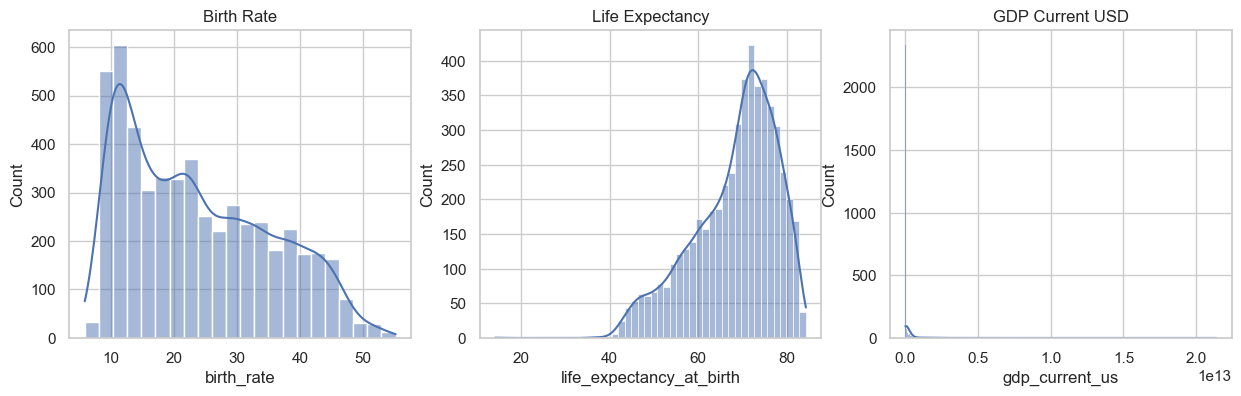

In [56]:
# Histograms
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(x2, kde=True)
plt.title("Birth Rate")

plt.subplot(1,3,2)
sns.histplot(y2, kde=True)
plt.title("Life Expectancy")

plt.subplot(1,3,3)
sns.histplot(gdp, kde=True)
plt.title("GDP Current USD")
plt.show()

In [57]:

# Make GDP groups (low, mid, high)
df["gdp_group"] = pd.qcut(df["gdp_current_us"], q=3, labels=["low","middle","high"])
print("\nGDP group distribution:")
print(df["gdp_group"].value_counts())


GDP group distribution:
gdp_group
low       1711
high      1711
middle    1709
Name: count, dtype: int64


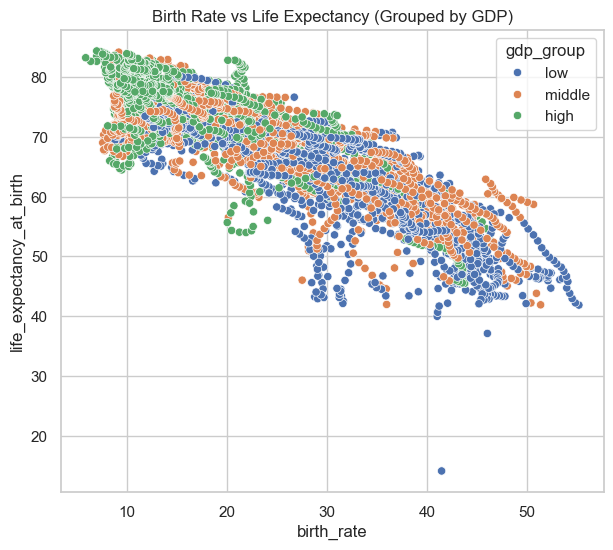

In [58]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="birth_rate",
    y="life_expectancy_at_birth",
    hue="gdp_group"
)
plt.title("Birth Rate vs Life Expectancy (Grouped by GDP)")
plt.show()


In [59]:
# Correlation Tests (overall and by GDP group)

In [60]:
print("---- RQ2 Correlation ----")

# Normality for choosing method
use_pearson2 = (shapiro(x2).pvalue > 0.05) and (shapiro(y2).pvalue > 0.05)

if use_pearson2:
    r_total, p_total = pearsonr(x2, y2)
    method = "Pearson"
else:
    r_total, p_total = spearmanr(x2, y2)
    method = "Spearman"

print(f"Overall {method} correlation =", r_total, "p-value =", p_total)

# Group-wise correlations
print("\nCorrelations by GDP group:")
for g in ["low","middle","high"]:
    dfg = df[df["gdp_group"] == g]
    if len(dfg) < 3:
        print(g, ": not enough data")
        continue
    
    xg = dfg["birth_rate"]
    yg = dfg["life_expectancy_at_birth"]
    
    if use_pearson2:
        r, p = pearsonr(xg, yg)
    else:
        r, p = spearmanr(xg, yg)

    print(f"{g}: r={r:.3f}, p={p:.4g}")

---- RQ2 Correlation ----
Overall Spearman correlation = -0.8400670512467768 p-value = 0.0

Correlations by GDP group:
low: r=-0.842, p=0
middle: r=-0.816, p=0
high: r=-0.679, p=7.974e-232
